In [1]:
import os

os.chdir("..")

print(os.getcwd())

c:\Users\mquick\Documents\zeitgeist blog\projects


In [2]:
import pandas as pd
import numpy as np
from words_deeds.types.democracy_indices import electoral, liberal, egalitarian
from words_deeds.utils import get_exec_suffixes, assign_dem_score, assign_exec_score, all_zero
from typing import Union

In [3]:
constitute = pd.read_csv("./words_deeds/data/constitute.csv", on_bad_lines="skip")

C:\Users\mquick\AppData\Local\Temp\ipykernel_53704\2859594967.py:1: DtypeWarning: Columns (20,23,24,26,27,30,32,33,35,36,38,39,42,44,45,47,48,51,53,54,56,57,59,60,62,63,64,65,67,68,69,71,72,74,75,77,78,81,83,84,86,89,90,92,93,95,96,98,99,102,104,105,107,108,110,111,113,114,116,117,119,120,122,123,125,126,128,129,131,132,134,135,148,160,161,163,164,166,167,169,170,172,173,175,176,178,179,181,182,184,185,187,188,190,191,192,193,194,196,197,199,200,218,219,228,229,242,243,257,258,263,264,266,267,269,270,272,273,275,276,278,279,281,282,284,285,286,287,288,290,291,293,294,296,297,312,313,315,316,325,326,339,340,352,353,355,356,358,359,361,362,364,365,367,368,370,371,373,374,376,377,379,380,391,392,403,404,407,416,417,428,429,431,432,445,447,448,450,451,464,465,467,468,479,480,491,492,493,494,495,497,498,500,501,514,515,518,521,534,544,545,547,548,557,558,560,561,563,564,566,567,569,570,572,573,574,575,578,579,586,587,589,590,592,593,595,596,612,613,615,616,618,619,627,628,629,630,631,633,63

In [4]:
index_cols = ["cowcode", "country", "year"]

#### Electoral democracy

In [5]:
electoral_df = constitute[index_cols+[indicator.name for indicator in electoral.indicators]].copy()

In [6]:
for indicator in electoral.indicators:
    electoral_df[indicator.name] = electoral_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [7]:
exec_indicators = get_exec_suffixes(electoral_df.columns)

In [8]:
for indicator in exec_indicators:
    electoral_df[f"exec_{indicator}"] = electoral_df.apply(lambda x: assign_exec_score(x, indicator), axis=1)
    electoral_df.drop([f"hos{indicator}", f"hog{indicator}"], axis=1, inplace=True)

In [9]:
electoral_indicators_final = electoral_df.columns[3:]
electoral_df["words"] = electoral_df[electoral_indicators_final].sum(axis=1)
electoral_df["words"] = electoral_df["words"] / len(electoral_indicators_final)

<Axes: xlabel='year'>

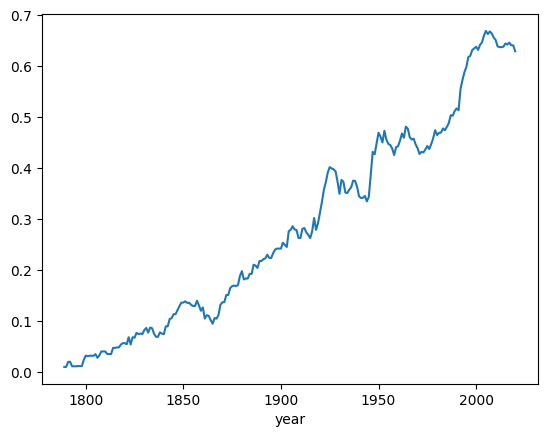

In [10]:
electoral_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Liberal democracy

In [11]:
liberal_df = constitute[index_cols+[indicator.name for indicator in liberal.indicators]].copy()

In [12]:
for indicator in liberal.indicators:
    liberal_df[indicator.name] = liberal_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [13]:
exec_indicators = get_exec_suffixes(liberal_df.columns)

In [14]:
for indicator in exec_indicators:
    liberal_df[f"exec_{indicator}"] = liberal_df.apply(lambda x: assign_exec_score(x, indicator), axis=1)
    liberal_df.drop([f"hos{indicator}", f"hog{indicator}"], axis=1, inplace=True)

In [15]:
liberal_indicators_final = liberal_df.columns[3:]
liberal_df["words"] = liberal_df[liberal_indicators_final].sum(axis=1)
liberal_df["words"] = liberal_df["words"] / len(liberal_indicators_final)

<Axes: xlabel='year'>

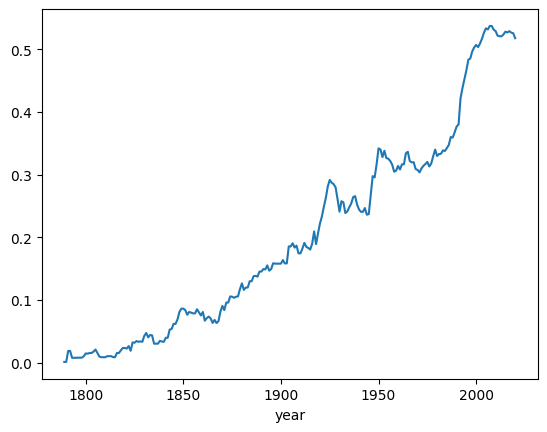

In [16]:
liberal_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Egalitarian

In [17]:
egalitarian_df = constitute[index_cols+[indicator.name for indicator in egalitarian.indicators]].copy()

In [18]:
for indicator in egalitarian.indicators:
    egalitarian_df[indicator.name] = egalitarian_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [19]:
egalitarian_indicators_final = egalitarian_df.columns[3:]
egalitarian_df["words"] = egalitarian_df[egalitarian_indicators_final].sum(axis=1)
egalitarian_df["words"] = egalitarian_df["words"] / len(egalitarian_indicators_final)

<Axes: xlabel='year'>

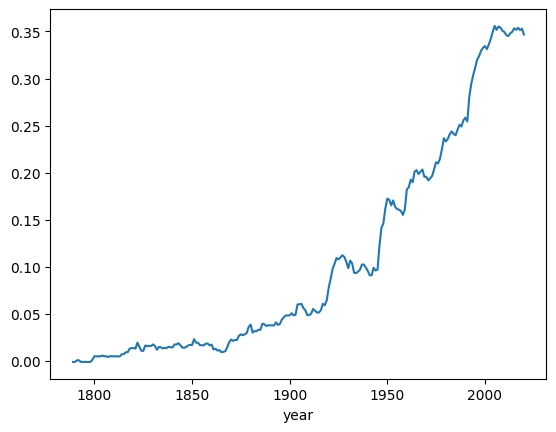

In [20]:
egalitarian_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Merge datasets

In [21]:
words_dataframes = []
dem_types = ["electoral", "liberal", "egalitarian"]
dataframes = [electoral_df, liberal_df, egalitarian_df]
indicators = [electoral_indicators_final, liberal_indicators_final, egalitarian_indicators_final]

for dem_type, df, dem_indicators in zip(dem_types, dataframes, indicators):
    df = df[~df[dem_indicators].apply(all_zero, axis=1)]
    df["dem_type"] = dem_type
    words_dataframes.append(df)
    
words_df = pd.concat(words_dataframes)

C:\Users\mquick\AppData\Local\Temp\ipykernel_53704\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dem_type"] = dem_type
C:\Users\mquick\AppData\Local\Temp\ipykernel_53704\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dem_type"] = dem_type
C:\Users\mquick\AppData\Local\Temp\ipykernel_53704\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [22]:
words_df = words_df[["cowcode", "country", "year", "dem_type", "words"]]\
    .pivot_table(index=index_cols, columns="dem_type", values="words")\
    .reset_index()\
    .rename_axis(None, axis=1)

In [23]:
words_df["words_total"] = words_df[dem_types].mean(axis=1)

<Axes: xlabel='year'>

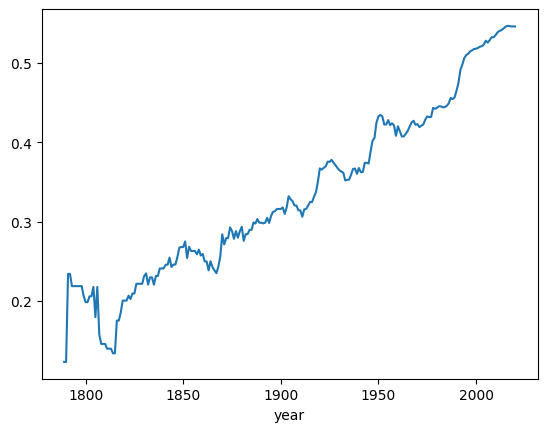

In [24]:
words_df\
    .groupby(["year"])["words_total"].mean()\
    .plot.line()

In [25]:
words_df.loc[(words_df["year"]==2020), ["country", "words_total"]]\
    .sort_values("words_total", ascending=True)\
    .head(20)

,country,words_total
12376,Brunei,0.012988
12831,New Zealand,0.073529
10610,Saudi Arabia,0.128917
3825,United Kingdom,0.197503
13399,Samoa,0.274133
10836,United Arab Emirates,0.289216
10786,Qatar,0.291352
12334,Singapore,0.302204
12661,Australia,0.310248
10861,Oman,0.313097


In [26]:
words_df.to_csv("./words_deeds/data/words_scores.csv", index=False)